In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, classification_report,roc_curve


In [21]:
!pip install matplotlib seaborn pandas numpy scikit-learn


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, classification_report,roc_curve


In [23]:
# Load dataset (correct relative path)
df = pd.read_csv(r"C:\Users\Admin\Downloads\mds cbp dataset new.csv")

print(" File loaded successfully!")
print("Shape:", df.shape)
df.head()


 File loaded successfully!
Shape: (99999, 34)


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218,NaN,0.0,Serious,NaN,04-01-2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450,C,0.0,Slight,NaN,05-01-2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0,NaN,0.0,Slight,NaN,06-01-2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220,NaN,0.0,Slight,NaN,07-01-2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0,NaN,0.0,Slight,NaN,10-01-2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [24]:
# STEP 2 : Data Preprocessing & Cleaning

#  Preview columns
print("Columns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year', 'InScotland']


In [25]:
# Handle missing values
# - Fill numeric columns with median
# - Fill categorical columns with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values handled successfully.")



Missing values handled successfully.


In [26]:
# Encode target column Accident_Severity into binary classes
# (Adjust labels if your dataset uses different words)
if 'Accident_Severity' in df.columns:
    # Convert to string, strip spaces, and standardize case
    df['Accident_Severity'] = df['Accident_Severity'].astype(str).str.strip().str.title()
    
    # Map categories to binary values
    df['Accident_Severity'] = df['Accident_Severity'].replace({
        'Slight': 0,
        'Serious': 1,
        'Fatal': 1
    })
    print("\nTarget column 'Accident_Severity' encoded successfully.")
else:
    raise KeyError("'Accident_Severity' column not found in the dataset!")



Target column 'Accident_Severity' encoded successfully.


C:\Users\Admin\AppData\Local\Temp\ipykernel_3312\3889062632.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Accident_Severity'] = df['Accident_Severity'].replace({


In [27]:
#  Separate features (X) and target (y)
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col].astype(str))

#  Feature Scaling for numeric consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Data preprocessing completed successfully!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)




 Data preprocessing completed successfully!
Training set shape: (79999, 33)
Testing set shape: (20000, 33)


In [35]:
# STEP 3: Train, Evaluate, and Save the Model (Random Forest Classifier)

import os
import joblib
from sklearn.preprocessing import LabelEncoder  # in case not already imported

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',   # handles class imbalance
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5
)

# Train the model
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Ensure correct numeric types
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

 Model Evaluation Results:
Accuracy:  78.14%
Precision: 0.29
Recall:    0.42
F1 Score:  0.34
ROC-AUC:   69.86%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     17268
           1       0.29      0.42      0.34      2732

    accuracy                           0.78     20000
   macro avg       0.60      0.63      0.61     20000
weighted avg       0.82      0.78      0.80     20000



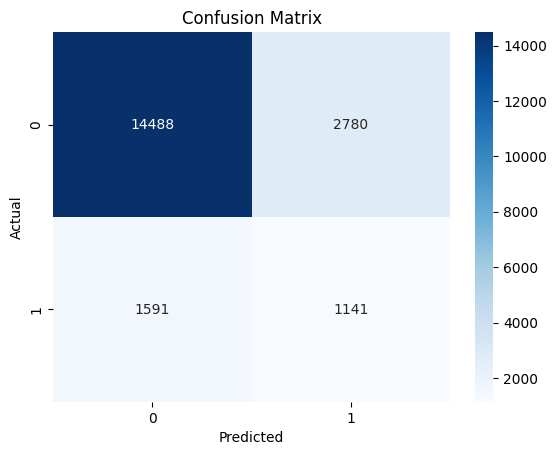

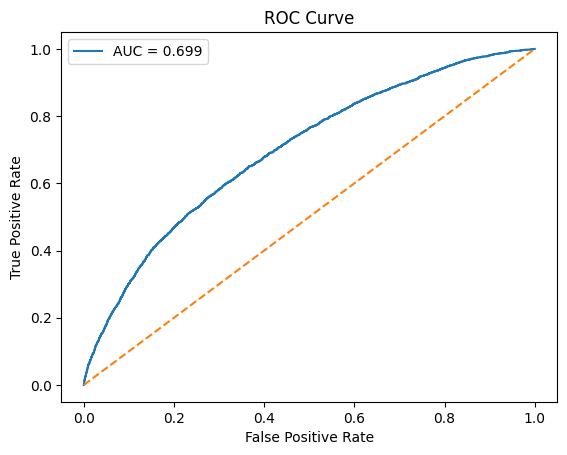

In [37]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print(" Model Evaluation Results:")
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"ROC-AUC:   {roc_auc*100:.2f}%")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [38]:
# ---------------- NEW: persist everything needed for inference ----------------
os.makedirs("models", exist_ok=True)

# 1) Save the trained model
joblib.dump(rf_model, "models/accident_model.pkl")

# 2) Save the scaler from Step 2
joblib.dump(scaler, "models/scaler.pkl")
# 3) Save per-column LabelEncoders (fit on original df for stable mappings)
encoders_dict = {}
for col in X.columns:
    if df[col].dtype == 'object':
        enc = LabelEncoder().fit(df[col].astype(str))
        encoders_dict[col] = enc
joblib.dump(encoders_dict, "models/encoders.pkl")

# 4) Save the exact training feature order
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "models/features.pkl")

print("\n Saved to models/:")
print(" accident_model.pkl")
print(" scaler.pkl")
print(" encoders.pkl")
print(" features.pkl")




 Saved to models/:
 accident_model.pkl
 scaler.pkl
 encoders.pkl
 features.pkl


In [42]:
def predict_accident_probability(
    latitude, longitude, speed_limit, weather, road_type,
    light_condition, urban_rural, hour, day_of_week, month
):
    """
    Predict the probability of an accident given environmental & traffic conditions.
    """

    # Load saved model, scaler, encoders, and feature order
    rf_model = joblib.load("models/accident_model.pkl")
    scaler = joblib.load("models/scaler.pkl")
    encoders_dict = joblib.load("models/encoders.pkl")
    feature_columns = joblib.load("models/features.pkl")

    # Create a single-row dataframe with input values
    input_data = pd.DataFrame([{
        'Latitude': latitude,
        'Longitude': longitude,
        'Speed_limit': speed_limit,
        'Weather_Conditions': weather,
        'Road_Type': road_type,
        'Light_Conditions': light_condition,
        'Urban_or_Rural_Area': urban_rural,
        'Hour': hour,
        'Day_of_Week': day_of_week,
        'Month': month
    }])

    # Ensure all required columns exist (match training data)
    for col in feature_columns:
        if col not in input_data.columns:
            input_data[col] = 0  # placeholder for missing columns

    # Reorder columns to match the training features
    input_data = input_data[feature_columns]

    # Encode categorical columns (using saved encoders)
    for col in input_data.columns:
        if input_data[col].dtype == 'object' and col in encoders_dict:
            encoder = encoders_dict[col]
            # handle unseen labels safely
            input_data[col] = input_data[col].apply(
                lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1
            )

    # Scale numeric features
    input_scaled = scaler.transform(input_data)

    # Predict probability
    prob = rf_model.predict_proba(input_scaled)[0][1]

    print(f"🚦 Accident Probability: {prob*100:.2f}%")
    return prob


In [43]:
# Scenario 1: High-risk (nighttime, rain, rural road)

predict_accident_probability(

   latitude=52.5, longitude=-1.9, speed_limit=80,

   weather='Rainy', road_type='Single carriageway',

   light_condition='Darkness - lights lit',

   urban_rural='Rural', hour=23, day_of_week=6, month=12

)


🚦 Accident Probability: 36.11%


np.float64(0.3610703917392438)

In [44]:
# Scenario 2: Low-risk (clear, daylight, urban area)

predict_accident_probability(

   latitude=52.5, longitude=-1.9, speed_limit=40,

   weather='Fine no high winds', road_type='Dual carriageway',

   light_condition='Daylight', urban_rural='Urban',

   hour=14, day_of_week=3, month=8

)



🚦 Accident Probability: 31.65%


np.float64(0.3164670518378552)

In [45]:
# STEP  5: Check Model Accuracy and Metrics Again

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display results
print(" Model Evaluation Results:")
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"ROC-AUC:   {roc_auc*100:.2f}%")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))



 Model Evaluation Results:
Accuracy:  78.14%
Precision: 0.29
Recall:    0.42
F1 Score:  0.34
ROC-AUC:   69.86%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     17268
           1       0.29      0.42      0.34      2732

    accuracy                           0.78     20000
   macro avg       0.60      0.63      0.61     20000
weighted avg       0.82      0.78      0.80     20000



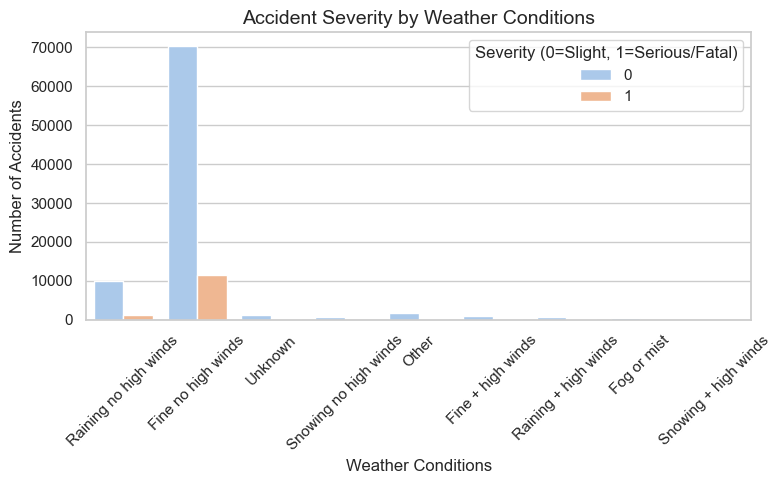

In [47]:
# STEP 6 : Visualizations for Accident Probability Insights

import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean theme
sns.set(style="whitegrid", palette="pastel")

#  Accident Severity vs Weather Conditions
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Weather_Conditions', hue='Accident_Severity')
plt.title("Accident Severity by Weather Conditions", fontsize=14)
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Severity (0=Slight, 1=Serious/Fatal)")
plt.tight_layout()
plt.show()


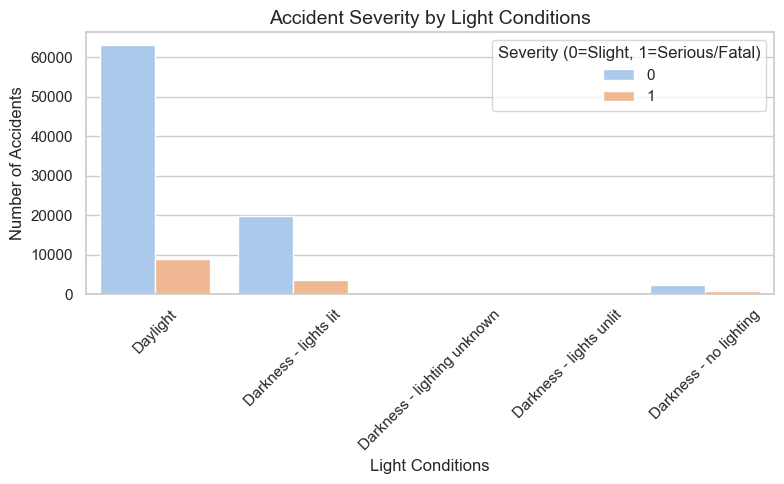

In [48]:
#  Accident Severity vs Light Conditions (Day/Night)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Light_Conditions', hue='Accident_Severity')
plt.title("Accident Severity by Light Conditions", fontsize=14)
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Severity (0=Slight, 1=Serious/Fatal)")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3312\3860296353.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Severity (0=Slight, 1=Serious/Fatal)")


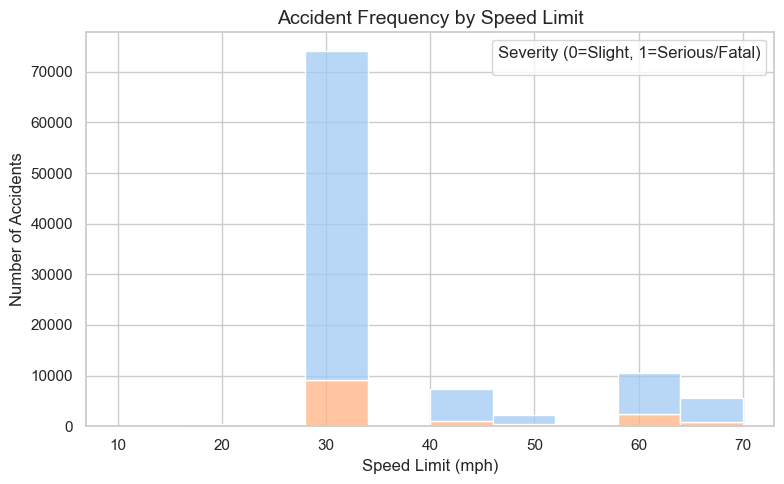

In [49]:
#  Accident Frequency by Speed Limit
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Speed_limit', hue='Accident_Severity', multiple='stack', bins=10)
plt.title("Accident Frequency by Speed Limit", fontsize=14)
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity (0=Slight, 1=Serious/Fatal)")
plt.tight_layout()
plt.show()

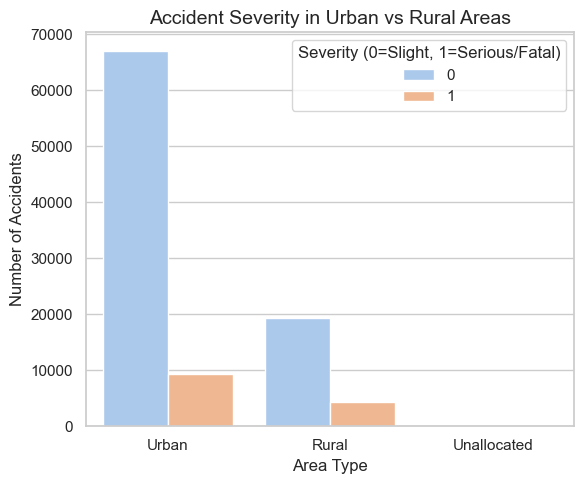

 Visualizations created successfully!


In [50]:
#  Urban vs Rural Area
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Urban_or_Rural_Area', hue='Accident_Severity')
plt.title("Accident Severity in Urban vs Rural Areas", fontsize=14)
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity (0=Slight, 1=Serious/Fatal)")
plt.tight_layout()
plt.show()
print(" Visualizations created successfully!")
